In [1]:
import optimizer_env as st
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time

%matplotlib inline  

env = st.StrOptEnv()

env.reset()

print(env.border_ang*180/np.pi)

29.571314963106314


In [2]:
#env.render()
#time.sleep(3)
#env.close()

In [ ]:
tot_rews = []

for k in range (200):
    env.reset()
    total_reward = 0
    rews = []
    actions = []
    errors = []
    states = []
    count = 0
    for i in range(100):
        count += 2
        #print(count)
        #act = 2
        act = np.random.randint(0,9)
        
        actions.append(act)
        #valami = env.reset()
        #env.reset()            
        val = env.step(act)
        #print('reward: ',val[1])
        #print('done: ',val[2])
        
        total_reward += val[1]
        
        rews.append(total_reward)
        errors.append(env.error)
        states.append(env.state)
        
        if val[2]:
            break
        
    #valami = env.step(act)[0]
    #env.save_plot(env.check_error, env.check_r)
    #plt.plot([env.KPLX, env.state[2], env.state[0], -env.state[0]], [env.KPLY, env.state[3], env.state[1], env.state[1]])
    #plt.show
    #print(i,'error_mod' , env.check_error)
    #print(i,'r_array_mod', env.check_r)

    #plt.show()

    #print(env.state)

    #print(env.rack_travel)
    #print('total_reward: ', total_reward)
    
    #plt.plot(np.sort(np.asarray(actions), axis=None))
    
    #plt.figure()
    #print('TOTAL REWARD:')
    #plt.plot(rews, 'bo-')
    
    tot_rews.append(total_reward)

plt.figure()
print('TOTAL REWARD:')
plt.plot(tot_rews, 'bo-')


In [ ]:
plt.figure()
print('ERRORS:')
plt.plot(errors, 'bo-')

38.63316052729422


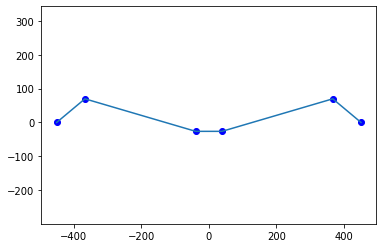

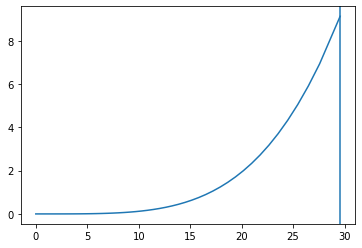

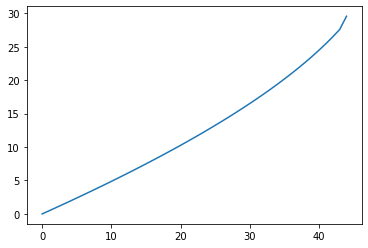

In [5]:
val = [-38.88920754,  -26.3054275,  -366.4644578,    69.88103422]
#val = solution.x
#val = states[0]

plt.plot([env.KPLX, val[2], val[0], -val[0], -val[2], -env.KPLX], [env.KPLY, val[3], val[1], val[1], val[3], env.KPLY], 'bo')
plt.plot([env.KPLX, val[2], val[0], -val[0], -val[2], -env.KPLX], [env.KPLY, val[3], val[1], val[1], val[3], env.KPLY])
plt.axis('equal')

env.state = val

env.step(1)

#print('error: ', env.error)

plt.figure()
plt.plot(env.check_r*180/np.pi, env.check_error*180/np.pi)
plt.axvline(x=env.border_ang / np.pi * 180)
#plt.axis([-2, (env.border_ang / np.pi * 180) + 1, 0, 3])


#print(env.check_r*180/np.pi)
print(env.rack_travel)

plt.figure()
plt.plot(env.check_r*180/np.pi)

#print(env.check_r/np.pi*180)
#print(env.check_error/np.pi*180)

In [3]:
solution = env.geometry_optimize()
print(solution)

arm = np.sqrt((solution.x[2] - env.KPLX)**2 + (solution.x[3] - env.KPLY)**2)

angle = np.arctan2(solution.x[3] - env.KPLY, solution.x[2] - env.KPLX)
print('ARM: ',arm)
print('Angle: ',angle*180/np.pi)
print('Travel: ',env.rack_travel)

     fun: 0.3201737129652962
     jac: array([-0.00143999, -0.00237273,  0.0134216 ,  0.00144443])
 message: 'Optimization terminated successfully.'
    nfev: 227
     nit: 29
    njev: 29
  status: 0
 success: True
       x: array([ -98.78628962, -196.21582742, -435.83586972, -103.65472844])
ARM:  104.61799708443712
Angle:  -82.21888316834334
Travel:  58.35696172264255


error:  0.3201737129652962
[2.54444375e-14 6.68622260e-01 1.33399575e+00 1.99626666e+00
 2.65557488e+00 3.31205441e+00 3.96583374e+00 4.61703623e+00
 5.26578043e+00 5.91218034e+00 6.55634577e+00 7.19838253e+00
 7.83839268e+00 8.47647480e+00 9.11272413e+00 9.74723282e+00
 1.03800901e+01 1.10113823e+01 1.16411934e+01 1.22696047e+01
 1.28966952e+01 1.35225418e+01 1.41472193e+01 1.47708004e+01
 1.53933560e+01 1.60149555e+01 1.66356663e+01 1.72555544e+01
 1.78746843e+01 1.84931190e+01 1.91109202e+01 1.97281485e+01
 2.03448632e+01 2.09611223e+01 2.15769832e+01 2.21925017e+01
 2.28077331e+01 2.34227318e+01 2.40375510e+01 2.46522434e+01
 2.52668609e+01 2.58814548e+01 2.64960755e+01 2.71107729e+01
 2.77255964e+01 2.83405948e+01 2.89558165e+01 2.95713150e+01]
58.35696172264255


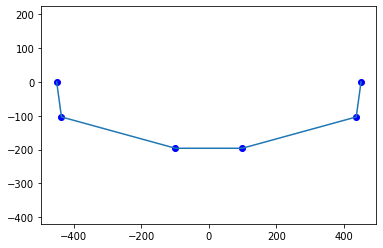

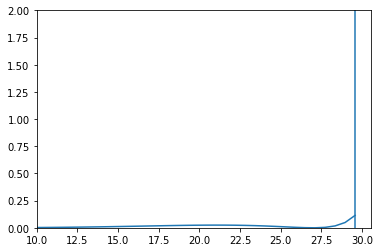

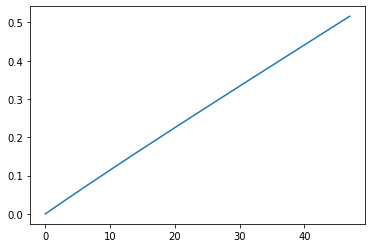

In [4]:
val = solution.x
#val = env.state

plt.plot([env.KPLX, val[2], val[0], -val[0], -val[2], -env.KPLX], [env.KPLY, val[3], val[1], val[1], val[3], env.KPLY], 'bo')
plt.plot([env.KPLX, val[2], val[0], -val[0], -val[2], -env.KPLX], [env.KPLY, val[3], val[1], val[1], val[3], env.KPLY])
plt.axis('equal')

env.state = solution.x

env.step(0)

print('error: ', env.error)

plt.figure()
plt.plot(env.check_r*180/np.pi, env.check_error*180/np.pi)
plt.axvline(x=env.border_ang / np.pi * 180)
plt.axis([10, (env.border_ang / np.pi * 180) + 1, 0, 2])

print(env.check_r*180/np.pi)
print(env.rack_travel)

plt.figure()
plt.plot(env.check_r)

In [ ]:
print(env.reset())

for i in range(env.action_space.n):
    print(env.step(i))
    print(env.error)


#reward = np.array([])

total_reward = 0

actions = []


In [ ]:
print(env.check_error)
print(env.check_r)

print(np.trapz(env.check_error, env.check_r))

plt.plot(env.check_r)

print(env.border_ang)

In [ ]:
print(env.state)
#plt.plot([env.KPLX, env.state[2], env.state[0], -env.state[0]], [env.KPLY, env.state[3], env.state[1], env.state[1]])
print([env.KPLX, env.state[2], env.state[0], -env.state[0]], [env.KPLY, env.state[3], env.state[1], env.state[1]])
env.step(2)[0]
#plt.plot([env.KPLX, env.state[2], env.state[0], -env.state[0]], [env.KPLY, env.state[3], env.state[1], env.state[1]])
print([env.KPLX, env.state[2], env.state[0], -env.state[0]], [env.KPLY, env.state[3], env.state[1], env.state[1]])

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

#plt.plot(env.b0_array + env.KPLX, env.b1_array + env.KPLY)
#plt.plot(env.b2_array + env.KPLX, env.b3_array + env.KPLY)
#plt.plot(env.b4_array + env.KPLX, env.b5_array)
#plt.plot(env.b6_array + env.KPLX, env.b7_array)

#plt.plot([env.KPLX, env.Ax0, env.Dx, -env.Dx], [env.KPLY, env.Ay0, env.Dy, env.Dy])
#plt.plot(env.z_array, env.b1_array/np.pi*180)
#plt.plot(np.flip(env.z_array, 0), env.r_array/2/np.pi*180)
plt.plot(reward)
#plt.axis('equal')
plt.show()

In [ ]:
plt.plot(env.x_array, env.r_array/np.pi*180)
plt.plot(env.x_array, env.l_array/np.pi*180)
plt.plot(env.x_array, env.k_array/np.pi*180)


In [ ]:
print(env.k_array[0]/np.pi*180)
print(env.r_array[0]/np.pi*180)

In [ ]:
env.k_array

In [ ]:
plt.plot(env.r_array, (env.l_array - env.r_array))
plt.plot(env.r_array, (env.k_array - env.r_array))

In [ ]:
plt.plot(env.r_array, ((env.k_array - env.l_array)**2))

In [ ]:
env.tr_eval

In [ ]:
env.error

In [ ]:
import timeit
import numpy as np

start = timeit.default_timer()

o = np.empty([])
oo = np.empty([])

i = 1
for i in range(100):
    env.step(-100 + 2*i)
    o = np.append(o, env.error)
    oo = np.append(oo, env.error_orig)
    
    plt.plot(env.r_array/np.pi*180, env.error_array/np.pi*180)
    plt.axvline(x=env.border_ang/np.pi*180)
    i += 1
    
stop = timeit.default_timer()
print('Time: ', stop - start)

plt.figure()
plt.plot(o[1:], '.')
plt.plot(oo[1:], '.')




In [ ]:
env.border_ang/np.pi*180

In [ ]:
env.step(0)

In [ ]:
len(env.error_array)

In [ ]:
len(env.r_array)

In [ ]:
np.trapz(env.error_array, env.r_array)

In [ ]:
plt.figure()
plt.plot(env.r_array[0:len(env.error_array)-env.int_chk], o[1:len(env.error_array)-env.int_chk+1], '.')
plt.plot(env.r_array, oo[1:], '.')




In [ ]:
env.int_chk

In [ ]:
plt.plot(env.r_array/np.pi*180, env.error_array/np.pi*180)
plt.axvline(x=env.border_ang/np.pi*180)

In [ ]:
result = {
  'a': lambda x: env.Dx = env.Dx + x,
  'b': lambda x: x + 7,
}['a'](5)

In [ ]:
from scipy.interpolate import interp1d

import numpy as np
x = np.array([0.5156312644066778, 0.526040469557302])
y = np.array([0.007969681162248856, 0.0154360504511115])

f = interp1d(x,y)



In [ ]:
def angle_chop(angle):
    chop = (angle*180/np.pi) % (np.sign(angle)*180)*np.pi/180
    real = -np.sign(angle)*np.pi + chop
    return real

In [ ]:
ang = -185 / 180 * np.pi

print((ang *180 / np.pi) % (np.sign(ang)*180))
print(np.sign(ang)*180)
print(ang)

In [ ]:
angle_chop(ang)/np.pi*180